# Single Exponential Smoothing (SES)

In [24]:
# Imports

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

## 1st Case

### Load datasets

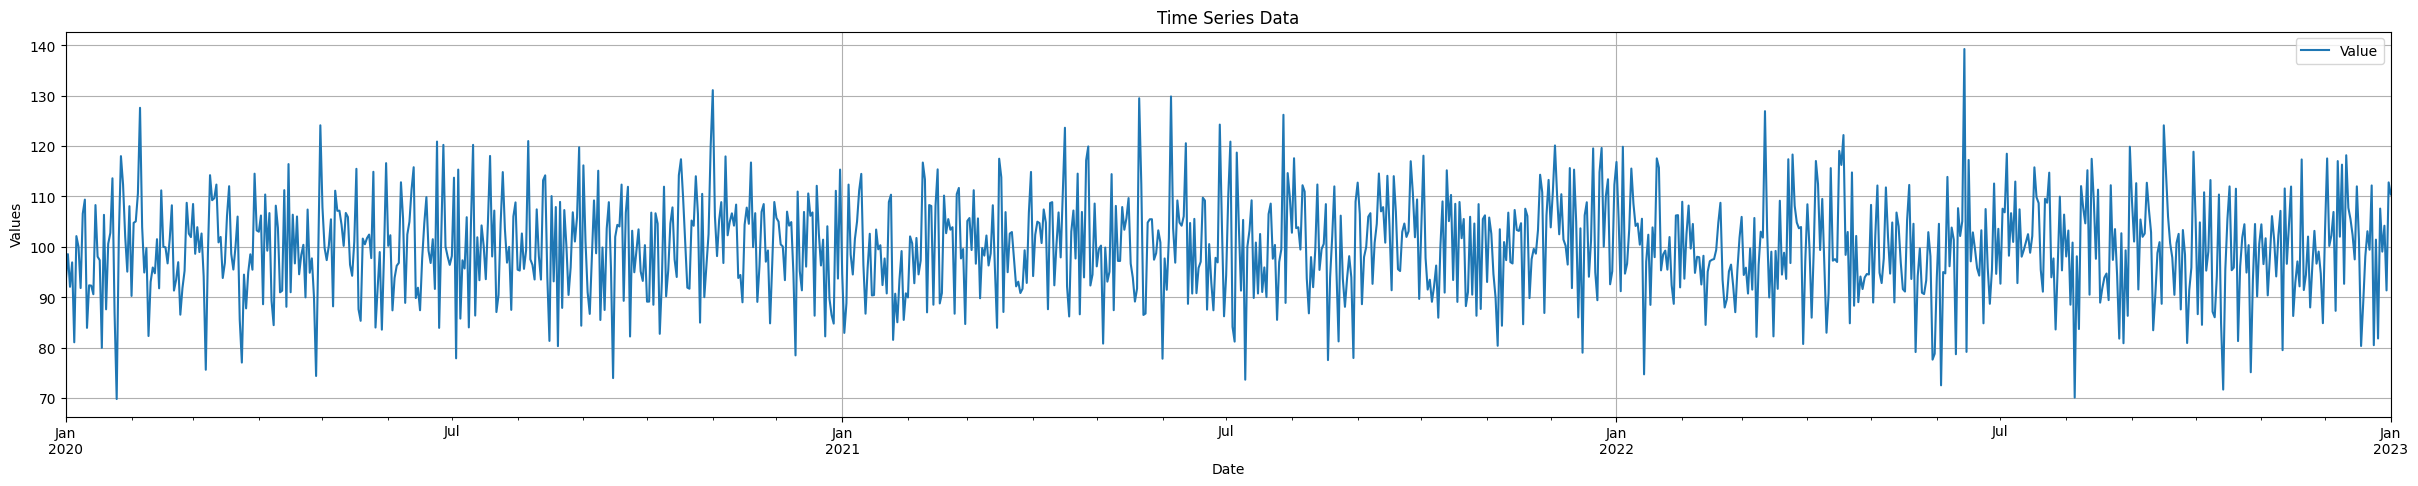

In [25]:
# Load dataset

ts = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/ts_ses_data-02.csv',
                      index_col = 'Date', parse_dates = True)

ts.plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'Time Series Data')
plt.show()

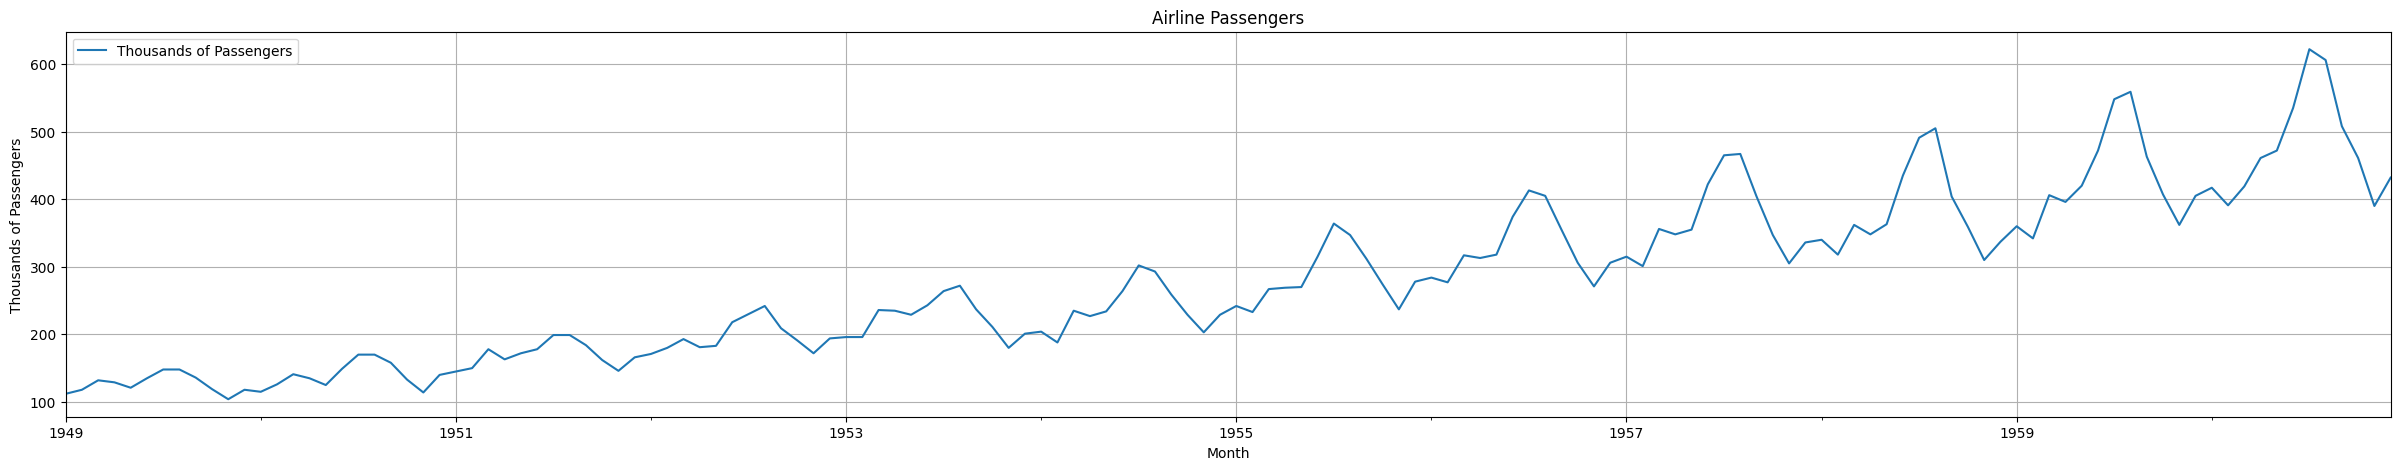

In [26]:
# Load dataset

airline = pd.read_csv('https://raw.githubusercontent.com/renatomaaliw3/public_files/master/Data%20Sets/airline_passengers.csv',
                      index_col = 'Month', parse_dates = True)

airline.plot(figsize = (30,5), grid = True, ylabel = 'Thousands of Passengers', title = 'Airline Passengers')
plt.show()

### Check for trend and seasonality (1st data set)

In [27]:
# STL Decomposition

from statsmodels.tsa.seasonal import STL

ts_stl = STL(ts["Value"], robust = True)  # Robust = better handling of outliers
decomp_stl = ts_stl.fit()

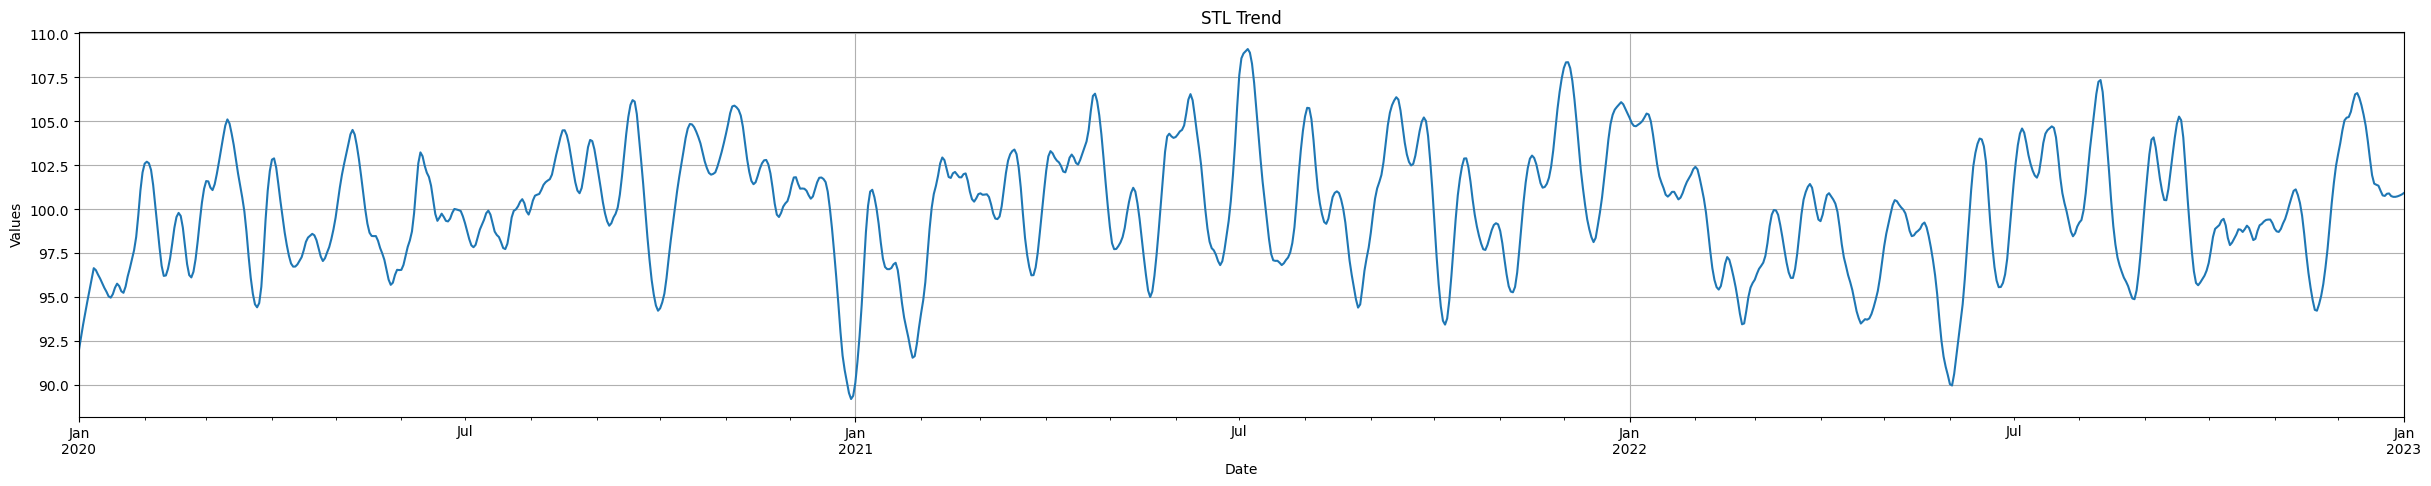

In [28]:
# STL Trend

decomp_stl.trend.plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'STL Trend')
plt.show()

# No Clear Trend

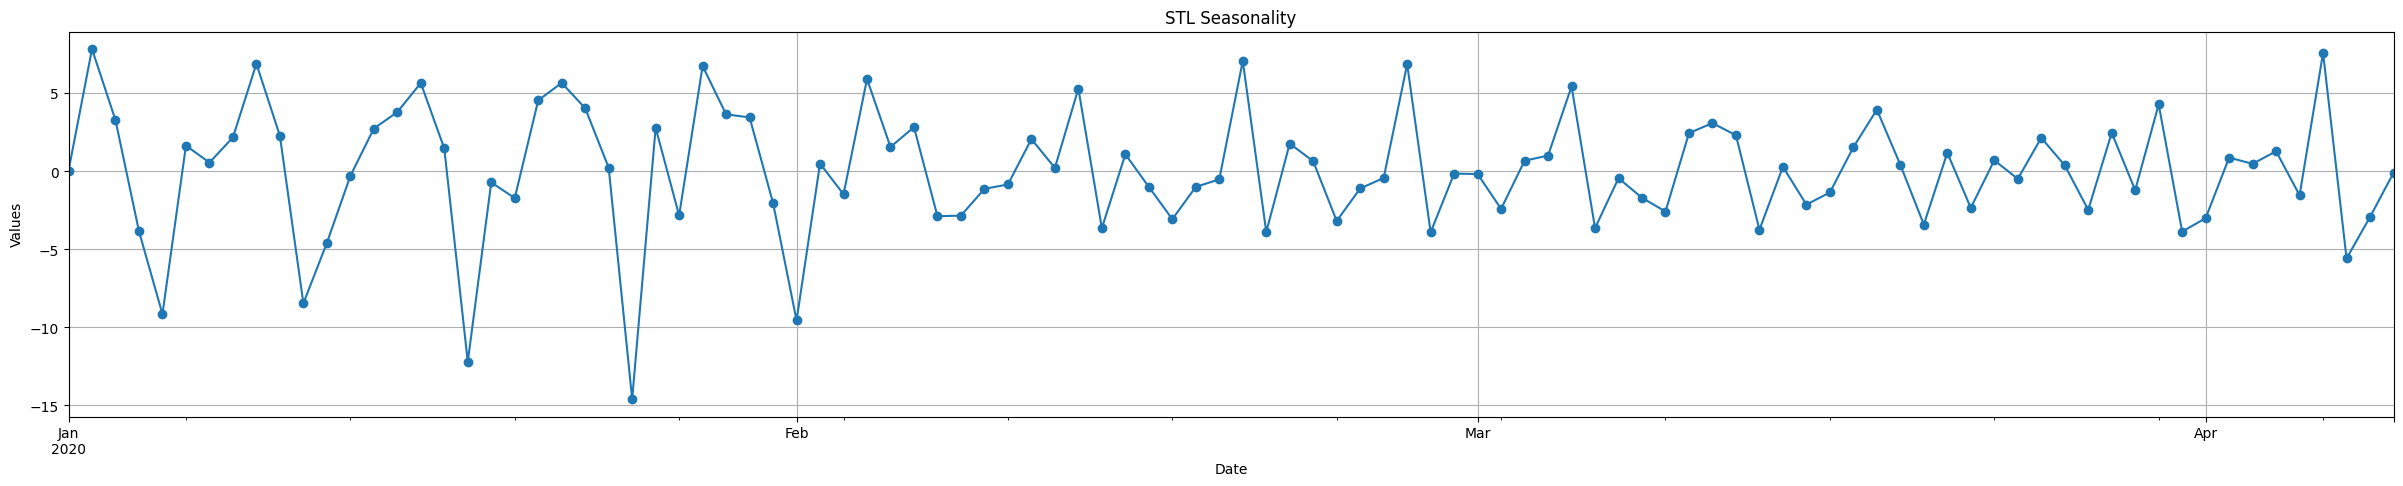

In [29]:
# STL Seasonality

decomp_stl.seasonal[:100].plot(figsize = (30,5), grid = True, ylabel = 'Values', title = 'STL Seasonality', marker = 'o')
plt.show()

# No Clear Seasonality

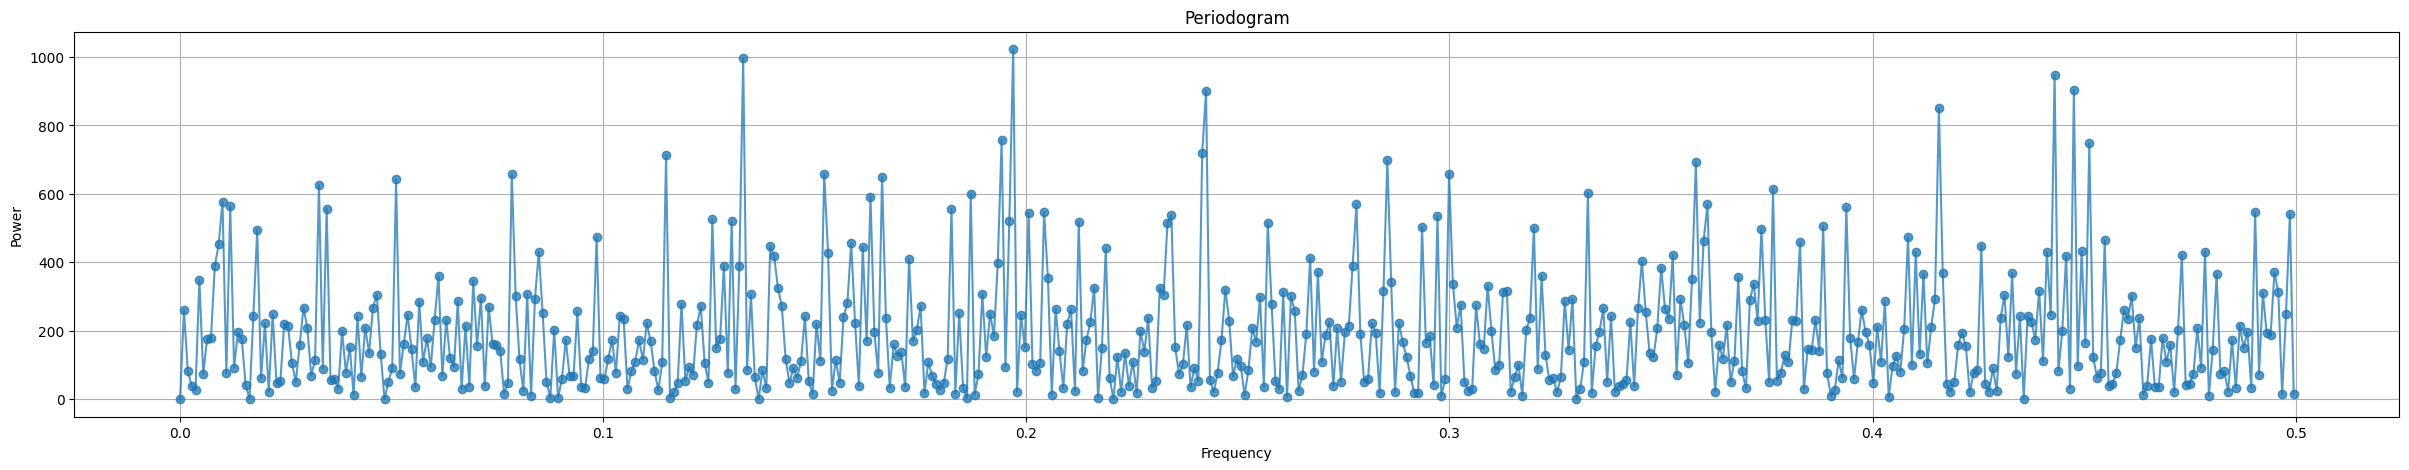

In [30]:
# Periodogram (for Seasonality)

from scipy.signal import periodogram

# Compute the periodogram
frequencies, power = periodogram(ts['Value'])

# Plot the periodogram
plt.figure(figsize=(30, 5))
plt.plot(frequencies, power, marker='o', linestyle='-', alpha = 0.75)
plt.title("Periodogram")
plt.xlabel("Frequency")
plt.ylabel("Power")
plt.grid(True)
plt.show()

# No Clear Seasonality

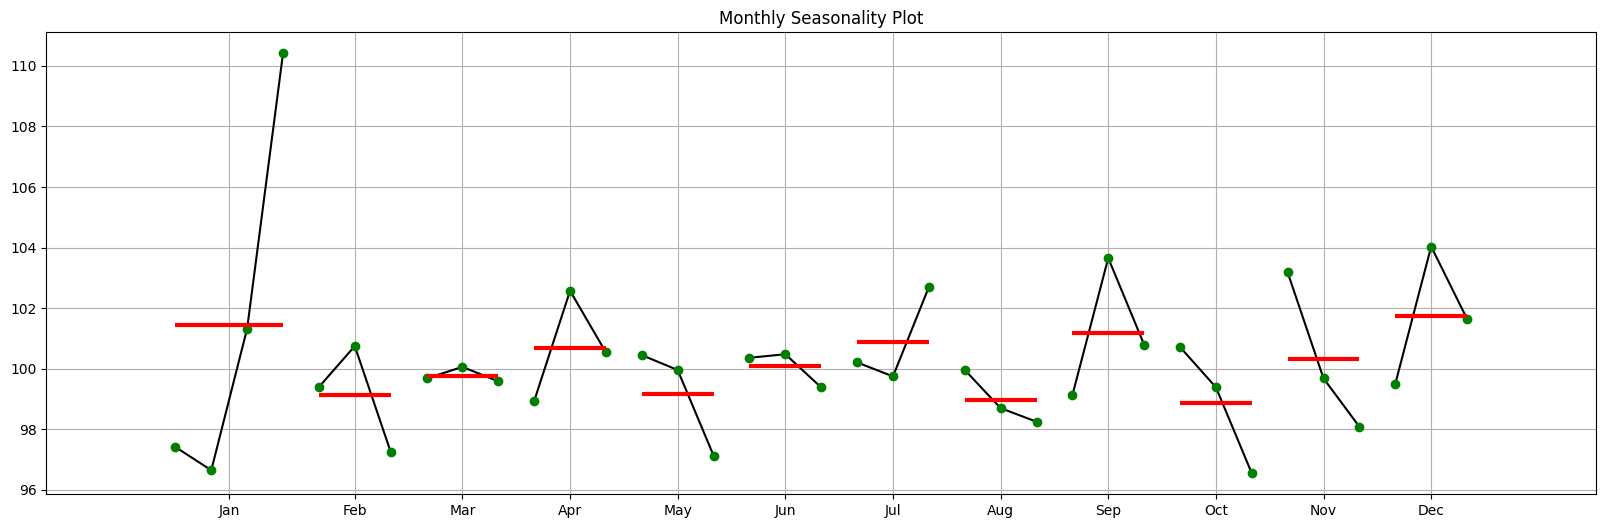

In [31]:
# Month Plots

from statsmodels.graphics.tsaplots import month_plot

ts_monthly = ts['Value'].resample('ME').mean()

fig, ax = plt.subplots(figsize=(20, 6))
month_plot(ts_monthly, ax = ax)
plt.title("Monthly Seasonality Plot")
plt.grid()

for line in ax.get_lines():

  line.set_marker('o')
  line.set_markerfacecolor('green')
  line.set_markeredgecolor('green')

plt.show()

# The black lines represent monthly disribution of values
# The red lines is the mean values for each month

# The red line does not show a perfectly smooth repeating pattern, but there are some slight fluctuations.
# There are higher means in December, September, July, and January while lower means in March, May, and August.
# However, these fluctuations are not very strong, meaning that the seasonality is not very pronounced.

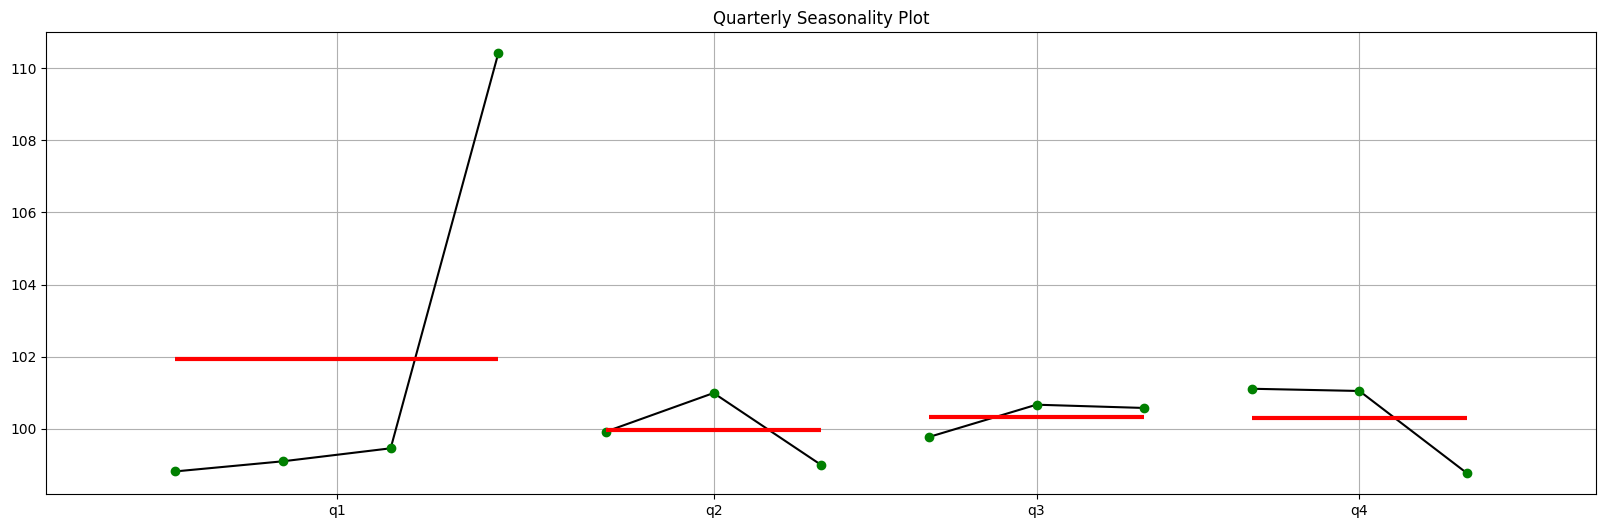

In [32]:
# Quarter Plots

from statsmodels.graphics.tsaplots import quarter_plot

ts_quarter = ts['Value'].resample('QE').mean()

fig, ax = plt.subplots(figsize=(20, 6))
quarter_plot(ts_quarter, ax = ax)
plt.title("Quarterly Seasonality Plot")
plt.grid()

for line in ax.get_lines():

  line.set_marker('o')
  line.set_markerfacecolor('green')
  line.set_markeredgecolor('green')

plt.show()

# The black lines represent monthly disribution of values
# The red lines is the mean values for each month

# Q1 (Jan-Mar) has a high spread, with some extreme values, making it more variable than other quarters.
# Q2, Q3, and Q4 show narrower spreads, suggesting more stable values across those periods
# If seasonality were strong, we would expect consistent patterns where certain quarters always have higher or lower values.

### Forecasting Using SES

#### 1. Select a Model

In [33]:
# We will use Single Exponential Smoothing or Simple Exponential Smoothing

from statsmodels.tsa.holtwinters import SimpleExpSmoothing

#### 2. Split data into train & test sets

In [34]:
# Splitting

forecast_horizon = 14 # or periods

train_data = ts.iloc[:-forecast_horizon] # data except the last 14 days
test_data = ts.iloc[-forecast_horizon:] # select the last 14 days

train_data = train_data.asfreq('D')
test_data = test_data.asfreq('D')

#### 3. Fit model on training set

In [35]:
ses_model = SimpleExpSmoothing(train_data['Value']).fit()

# ses_model.summary()

#### 4. Evaluate model on test set (visually first)

In [36]:
# Forecast/Predict based on train_data

ses_pred = ses_model.forecast(forecast_horizon)
ses_pred

,0
2022-12-19,99.733732
2022-12-20,99.733732
2022-12-21,99.733732
2022-12-22,99.733732
2022-12-23,99.733732
2022-12-24,99.733732
2022-12-25,99.733732
2022-12-26,99.733732
2022-12-27,99.733732
2022-12-28,99.733732


Text(0.5, 0, 'Date')

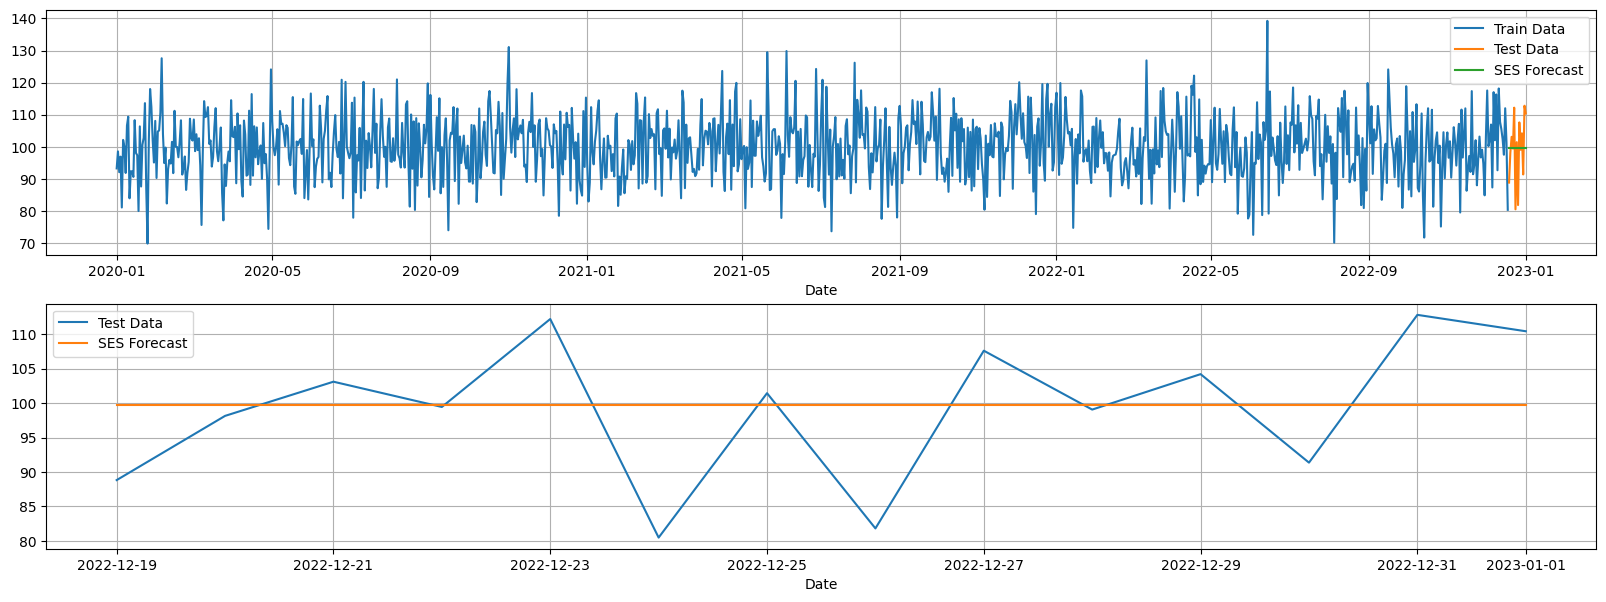

In [37]:
# Visualization

plt.figure(figsize = (20, 7))

plt.subplot(2, 1, 1)
plt.plot(train_data.index, train_data['Value'], label = 'Train Data')
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

plt.subplot(2, 1, 2)
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')

#### 5. Re-fit model on entire data set

In [38]:
# Notice we are using the entire dataset

ts = ts.asfreq('D')

ses_model = SimpleExpSmoothing(ts['Value']).fit()

6. Forecast for future data

In [39]:
# We forecast using the entire dataset

ses_pred = ses_model.forecast(forecast_horizon)
ses_pred

,0
2023-01-02,99.695687
2023-01-03,99.695687
2023-01-04,99.695687
2023-01-05,99.695687
2023-01-06,99.695687
2023-01-07,99.695687
2023-01-08,99.695687
2023-01-09,99.695687
2023-01-10,99.695687
2023-01-11,99.695687


Text(0.5, 0, 'Date')

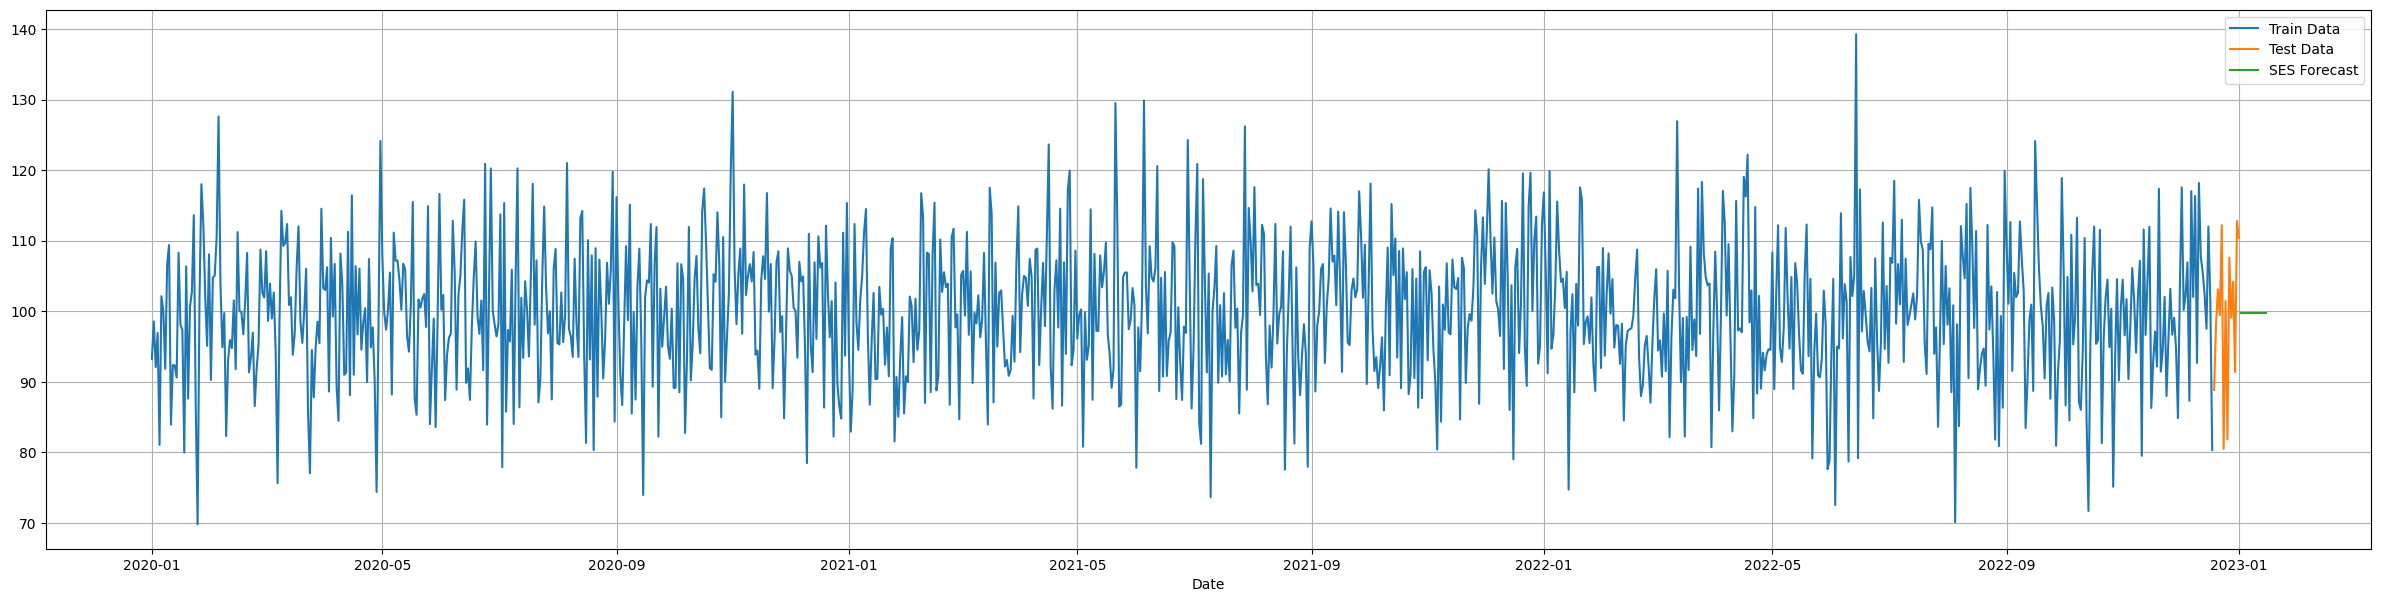

In [40]:
# Visualization

plt.figure(figsize = (30, 7))

plt.subplot(1, 1, 1)
plt.plot(train_data.index, train_data['Value'], label = 'Train Data')
plt.plot(test_data.index, test_data['Value'], label = 'Test Data')
plt.plot(ses_pred.index, ses_pred, label = 'SES Forecast')
plt.legend()
plt.grid()
plt.xlabel('Date')